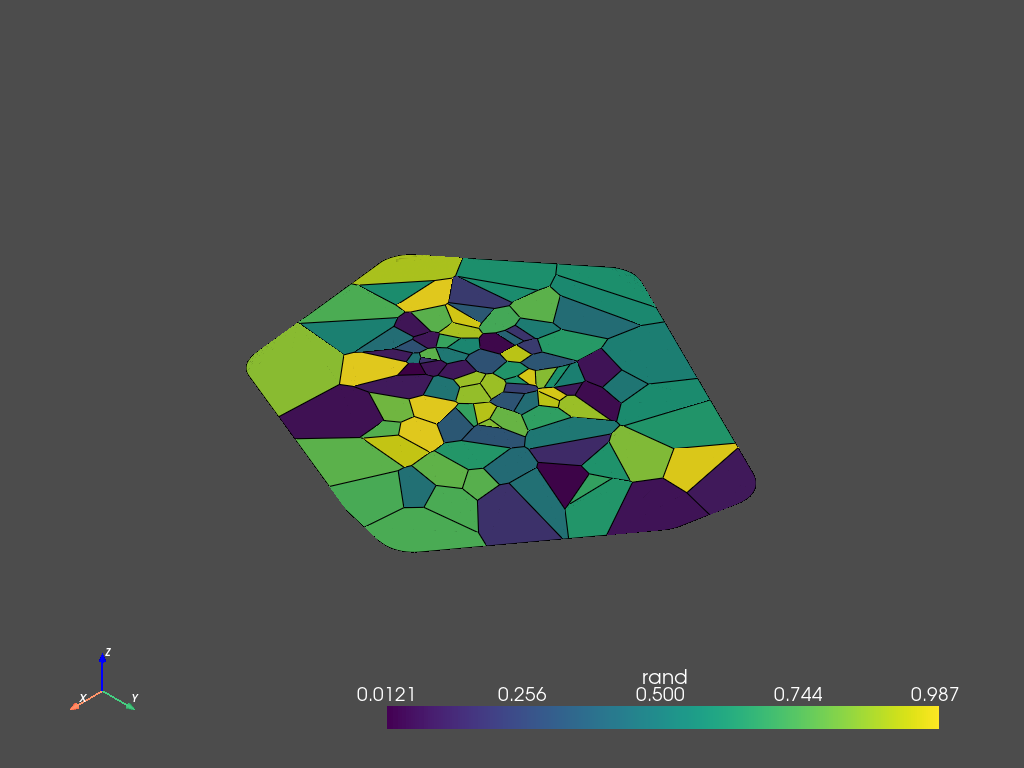

In [1]:
from voromesh import Voronoi
import numpy as np
import pyvista as pv

n = 100
points = np.random.randn(n, 2)



voro = Voronoi(points, buffer_size=0.4)

surfmesh = voro.to_pyvista()
surfmesh["rand"] = np.random.rand(n)

pv.set_jupyter_backend('static')
surfmesh.plot(notebook=True, show_edges=True, scalars="rand")

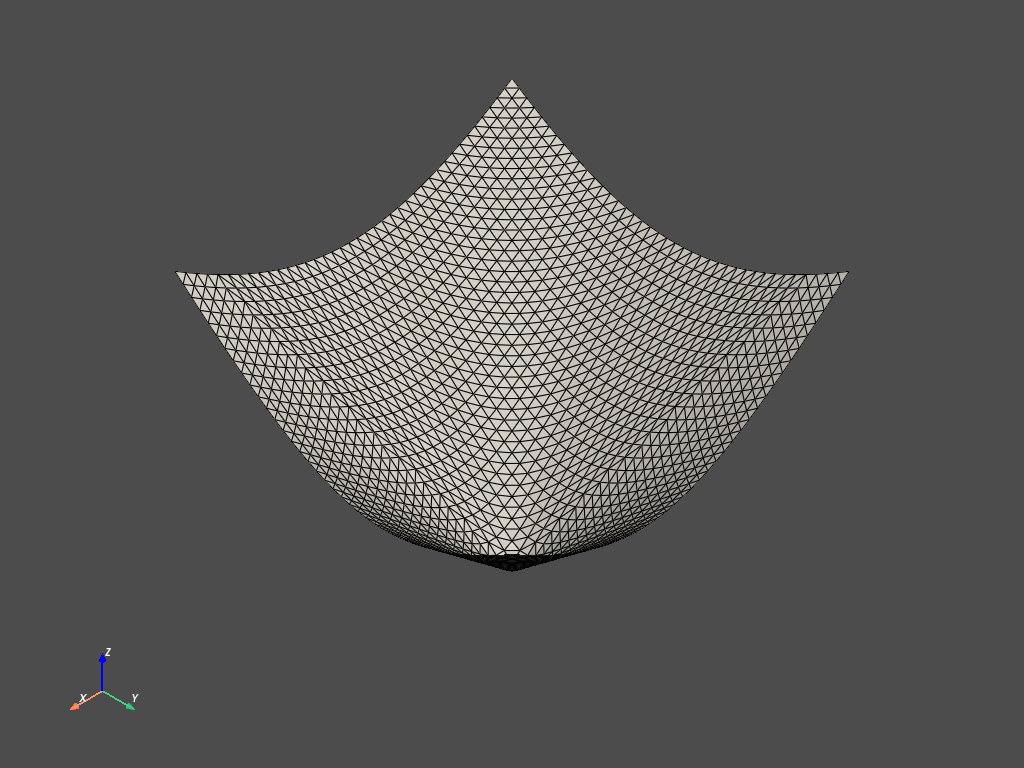

In [9]:
x = np.linspace(-10, 10, 40)
[xx, yy] = np.meshgrid(x, x)
zz = np.sqrt((xx-2)**2 + (yy-2)**2)

#A, b = 500, 100
#zz = A * np.exp(-0.5 * ((xx / b) ** 2.0 + (yy / b) ** 2.0))

points = np.column_stack([xx.flatten(), yy.flatten(), zz.flatten()])

cloud = pv.PolyData(points)

surf = cloud.delaunay_2d()
surf.plot(notebook=True, show_edges=True)

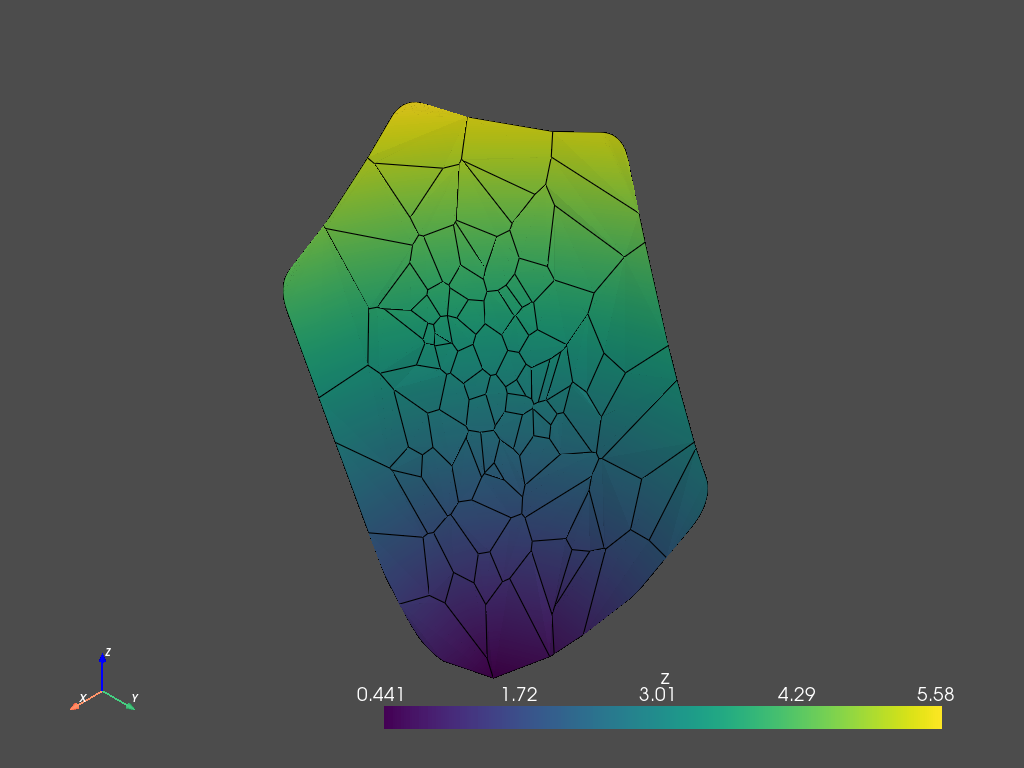

In [10]:
from voromesh import geo

surfmesh = geo.update_z_from_surf(surfmesh, surf)
surfmesh.plot(notebook=True, show_edges=True, scalars="z")



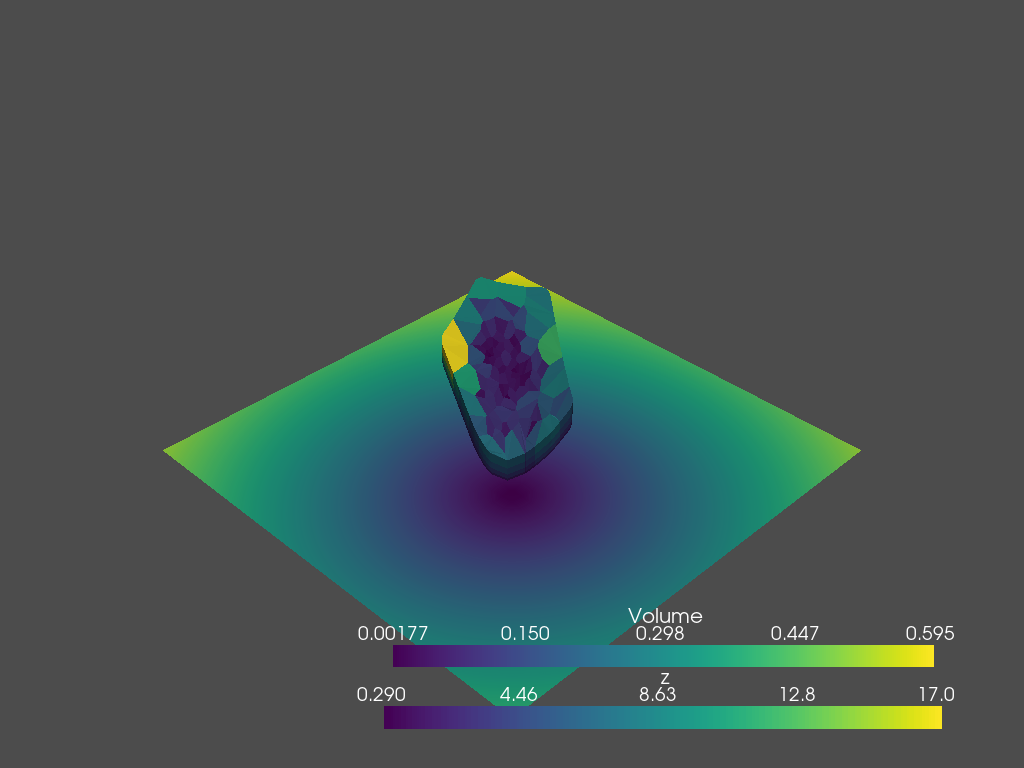

In [13]:
thickness = [0.1, 0.2, 0.3, 0.4]

volmesh = geo.layersfromsurf(surfmesh, thickness)

#volmesh["z"] = volmesh.points[:, 2]

#volmesh.plot(notebook=True, scalars="")

plotter = pv.Plotter(notebook=True)
plotter.add_mesh(surf)
plotter.add_mesh(volmesh)  
plotter.show()

In [14]:
surf.points[0:10, 2]

pyvista_ndarray([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])